Welcome to ML4S Episode 001. This notebook will explore Supervised Machine Learning for tabular data with focus on regression

In this notebook, we will explore regression from zero to hero. Unlike classification and clustering, regression requires some theoritical and mathematical understanding but it is not hard.



---





1.   What is Regression? <br>

Finding the line of best-fit basically. It can be used for prediction or forecasting.



*   Prediction: we have the data of Sajas midterm and final exams grades between Fall 2020 and Spring 2023. If Saja got 12/20 in the midterm during Spring 2023, predict her final exam grade. [searching within existing data]  <br>
*   Forecasting: we have the data of Sajas midterm and final exams grades between Fall 2020 and Spring 2023. If Saja got 19/20 in the midterm during Fall 2023, forecast her final exam grade. [expecting behaviour in future data]





For this notebook, download this dataset.
<br>
https://www.kaggle.com/datasets/darshanprabhu09/housing-dataset-of-5000-people-staying-in-usa/code <br>

we will not focus on functions that were explained in 000 unless its new

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/USA_Housing.csv')
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


As can be seen, we have 5000 records of USA houses owners income, house area, etc. Our goal is to create a model that can predict the house price.In other words, <br> **Predictors:** Avg. Area Income, Avg. Area Age, etc.. <br>
**Target:** Price.

In [ ]:
df.info() #did not tell you about it earlier. wanted you to struggle :3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


As can be seen all variables are numeric and without nulls except the address which is not needed so lets drop it

In [ ]:
df = df.drop(columns = ['Address'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


Now lets split the data into predictors (X) and target (y)

In [ ]:
X = df.drop(columns = ['Price']) #all columns except price (its our target)
y = df['Price']

### make sure shapes are consistent (both should have 5000 records)
print(X.shape)
print(y.shape)

(5000, 5)
(5000,)


Consistent. Now lets see some statistics about our predictors

In [ ]:
X.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039
std,10657.991214,0.991456,1.005833,1.234137,9925.650114
min,17796.631190,2.644304,3.236194,2.000000,172.610686
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769
max,107701.748378,9.519088,10.759588,6.500000,69621.713378


One thing that we can notice here is that Area Income and Area population max values is much higher than other predictors. This is ***not*** okay. why? <br> <br> because it creates instability in the model. To better understand this think of a plot of Area Income vs House Age. If your model forms its predictions based on the shortest distance between points, then an increase of 10 points on Area Income axis will barely do anything. However, the same increase on Area Age will result in drastic changes. Hence, you have to scale your data to a fixed scale.

In [ ]:
from sklearn.preprocessing import MinMaxScaler #sklearn is a library that has many useful tools to do different ML tasks.
#here we are importing a MinMaxScaler which scales all inputs to the smallest min and max

Scaler = MinMaxScaler() #just to make it shorter

#now use fit on the data you want to base your scaler on and transformer to change the data
#both can be combined through fit_transform attribute
X = Scaler.fit_transform(X)
X

array([[0.68682217, 0.44198584, 0.50150158, 0.46444444, 0.3299422 ],
       [0.68352073, 0.48853836, 0.46450137, 0.24222222, 0.57596801],
       [0.48373705, 0.46860901, 0.70135011, 0.69555556, 0.52858204],
       ...,
       [0.50713527, 0.67002636, 0.20853446, 0.02888889, 0.47651494],
       [0.55841872, 0.4203891 , 0.51757886, 0.76444444, 0.61128233],
       [0.53071451, 0.48699729, 0.47267788, 0.46      , 0.66708815]])

It is worth noting that applying any sklearn operation converts  the pandas dataframe into a numpy array. As you can see all values are now at the same scale.

Now we need to split our data into training, testing, and validation. Why do we do so?


1.   Training samples are used to train the model.
2.   Testing samples are used to evaluate the model later on.

We need this because the model sees training samples while training. Evaluating your results by showing the model samples it was trained on already is not fair (it is like having the previous y3ni). Hence, we need to have some testing samples that the model did not see before to properly evaluate the model.

3. Validation samples are used to enhance performace. The idea behind validation is to keep some training samples hidden while training and once a training epoch is done we will adjust the weights based on the validation samples.

In general a training, testing split only is fine. Validation split is usually used when you fear model overfitting. Overfitting is when you train your model for so long that it does not know anything except the samples it was trained on. Having a validation set prevents the model from falling into overfitting. <br> A good train/test split is 80/20 or 70/30. Adding validation has one draw back which is reducing the number of samples that you can train on. A good train/val/test split is 70/15/15 or 80/10/10.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #using a test size of 20% (80/20 split)


##Random_state == seed --> this is a very important parameter than many do not understand. Basically, the train_test_split
##randomly pick samples from your dataset. Having a seed or random state (42 in this case) means that you will generate the
##same random samples each time. This allows you to reproduce your results.

##if you want to add a validation split then just split again (See below)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

##Note that validation is taken from X_train (illustrates why you lose training samples)

Now we are set to do linear regression.

In [ ]:
from sklearn.linear_model import LinearRegression #as usual sklearn has all the models we need. feel free to use any (google them)

model = LinearRegression()
regressor = model.fit(X_train,y_train) ##fitting means train the model using the passed data
y_pred = model.predict(X_test) #obtain predictions on the unseen X_test. Note that
#I did not pass y_test (labels) because we want to compare the models prediction with the actual prediction (ground truth)
#for evaluation purposes

For regression there are two famous evaluation metrics. The first is MAE and the other is R-Squared. Many other metrics are available in the library (just ask your boss which metrics does he want). For myself I will use R-Squared as it basically shows how much of the variance from the real regression line can be explained by your model (needs to be high)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5813688768766941

woah! this is really good.

Okay do you want to see the real line in comparison to your model? why not cool stuff!

<Axes: xlabel='Price'>

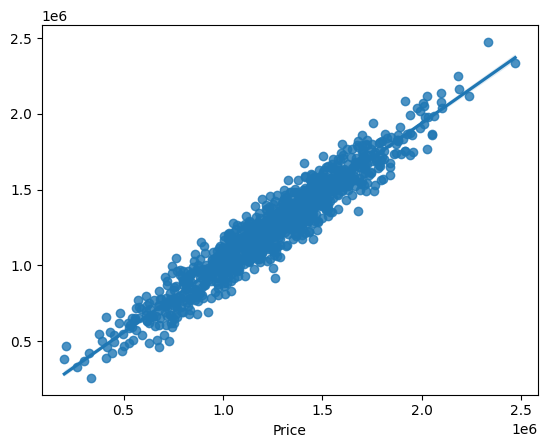

In [ ]:
import seaborn as sns #seaborn is a visualization library and it is very common along with matplotlib (u used this in signals)
sns.regplot(x= y_test, y = y_pred)

not very clear. checking the documentation of sns.regplot to change colors

<Axes: xlabel='Price'>

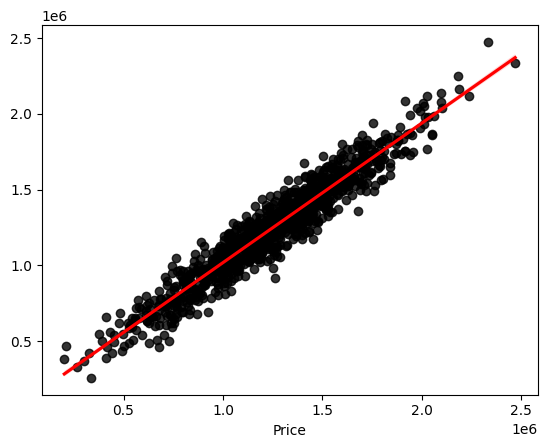

In [ ]:
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})

okay looks cool now. our regression line is good.

Practice Problem.  <br> Use the following dataset for this problem <br> https://www.kaggle.com/datasets/zakriarehman/weather-data-for-linear-regression <br><br>

1.   Use the dataset to predict the temprateure based on the remaining predictors
2.   plot a histogram of any variable. (hint: use seaborn)
3.   obtain the correclation coefficents (hint: use pandas built-in functions)
4.   Split the data with a 75/25 ratio
5.   Evaluate your model using MSE and R2
6.   Intrepret the results
7.   plot the regression line.



This ends 001. The next notebook will discuss non-linear regression but will be shared after 001 is graded


Histogram of Wind_Speed_kmh




<Axes: xlabel='Wind_Speed_kmh', ylabel='Count'>

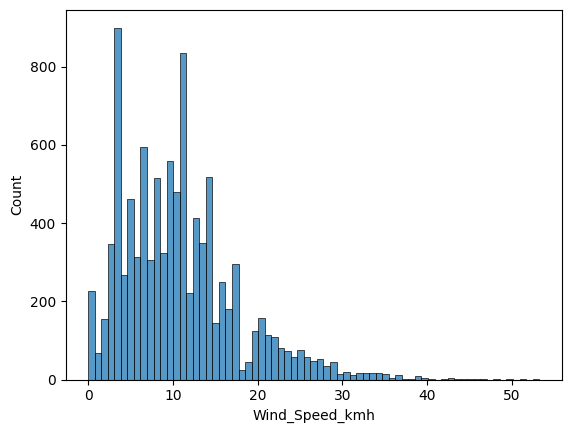

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('/content/weather.csv')

print("\nHistogram of Wind_Speed_kmh\n\n")
sns.histplot(data=df, x='Wind_Speed_kmh')

In [ ]:
print("the correclation coefficents")
df.corr()

the correclation coefficents


<ipython-input-22-53b34e1a0ef9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature_c,Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Pressure_millibars,Rain
Temperature_c,1.000000,-0.628855,0.009768,0.031397,0.389466,0.013739,0.557795
Humidity,-0.628855,1.000000,-0.222959,-0.007522,-0.375676,-0.011228,-0.225116
Wind_Speed_kmh,0.009768,-0.222959,1.000000,0.108276,0.100525,-0.051067,0.067543
Wind_Bearing_degrees,0.031397,-0.007522,0.108276,1.000000,0.052080,-0.005597,0.048564
Visibility_km,0.389466,-0.375676,0.100525,0.052080,1.000000,0.066663,0.302374
Pressure_millibars,0.013739,-0.011228,-0.051067,-0.005597,0.066663,1.000000,0.004147
Rain,0.557795,-0.225116,0.067543,0.048564,0.302374,0.004147,1.000000


In [ ]:
# target -> Temperature_c
# preedictors -> Humidity,Wind_Speed_kmh,Wind_Bearing_degrees,Visibility_km,Rain
# Drop the Description column since it is string
df = df.drop(columns = ['Description'])

# Split the data into predictors (X) and target (y)
X = df.drop(columns = ['Temperature_c']) # Drop all columns except Temperature_c
y = df['Temperature_c']

# Check if the shapes are consistent
print(X.shape)
print(y.shape)

# Turns out both are 10000 so we can continue

(10000, 6)
(10000,)


In [6]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
X = Scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=47)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
regressor = model.fit(X_train,y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE: ", mse)

# Calculate Adjusted R-squared
n = len(y_test) # The number of observations
k = X_train.shape[1] # The number of predictor variables
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R-squared:", adjusted_r_squared)

R-squared score:  0.5813688768766941
MSE:  36.80511467484544
Adjusted R-squared: 0.5803613410809702


**Result interpretation:**

- For the R-squared score, it ranges from 0 to 1. The closest it is to 1 the better. Here we have a value of nearly 58%. This value shows us how well our model predicts the temperature based on the predictor variables. Its like saying 58% of th variation of temperature values can be explained using the predictor variables.
58% is not great.

- For the Mean Squared Error, it gives us an idea of how close on average are our predicted temperature values from the actual values. So here we are off by about 36.8 units squared which can be a significant offset. The model needs improvement.



<Axes: xlabel='Temperature_c'>

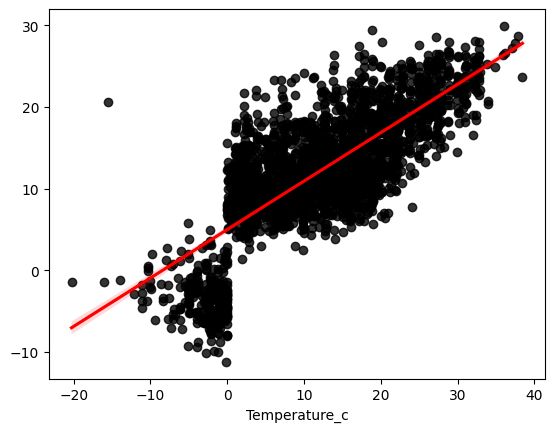

In [ ]:
sns.regplot(x= y_test, y = y_pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})